In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np


df = pd.read_csv('processed_data.csv')
df = df.drop(columns='loudness') ## drop loudness because it is highly correlated with energy

df['speechiness_log'] = np.log1p(df['speechiness'])  # log(1 + x) to handle zeros
df['instrumentalness_log'] = np.log1p(df['instrumentalness'])
df['liveness_log'] = np.log1p(df['liveness'])


clustering_features = ['danceability', 'energy', 'valence', 'tempo', 
                       'acousticness', 'speechiness_log', 'instrumentalness_log', 'liveness_log']

X = df[clustering_features]


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Sample a smaller portion of the dataset
X_sample = X.sample(n=10000, random_state=42)  # Adjust n as needed

# Compute cosine similarity on the sample
similarity_matrix_sample = cosine_similarity(X_sample.values)



In [10]:
from sklearn.cluster import SpectralClustering

# Set the number of clusters (adjust based on your needs)
n_clusters = 7  # Example, but you might adjust this based on your analysis

# Initialize Spectral Clustering with the precomputed similarity matrix
spectral_cluster = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
labels = spectral_cluster.fit_predict(similarity_matrix_sample)

# Add the cluster labels to the sampled DataFrame for analysis
X_sample['SpectralCluster'] = labels

# Check the distribution of clusters
print(X_sample['SpectralCluster'].value_counts())


SpectralCluster
0    3561
1    2256
2    1501
6    1135
4     926
3     611
5      10
Name: count, dtype: int64


In [13]:
# Group by Spectral Clusters to analyze features within each cluster
spectral_analysis = X_sample.groupby('SpectralCluster').mean()
print("Spectral Clustering Analysis:")
print(spectral_analysis)


Spectral Clustering Analysis:
                 danceability    energy   valence     tempo  acousticness  \
SpectralCluster                                                             
0                    0.665976  0.700967  0.737439  0.494005      0.254945   
1                    0.537352  0.762106  0.320453  0.553435      0.097744   
2                    0.522368  0.351600  0.353076  0.470419      0.772064   
3                    0.361973  0.175271  0.201590  0.437236      0.895199   
4                    0.514653  0.708402  0.449417  0.471829      0.360854   
5                    0.000000  0.000086  0.000000  0.000000      0.071788   
6                    0.583924  0.740928  0.324308  0.521142      0.100141   

                 speechiness_log  instrumentalness_log  liveness_log  
SpectralCluster                                                       
0                       0.081496              0.026584      0.151957  
1                       0.089374              0.024710      0.1

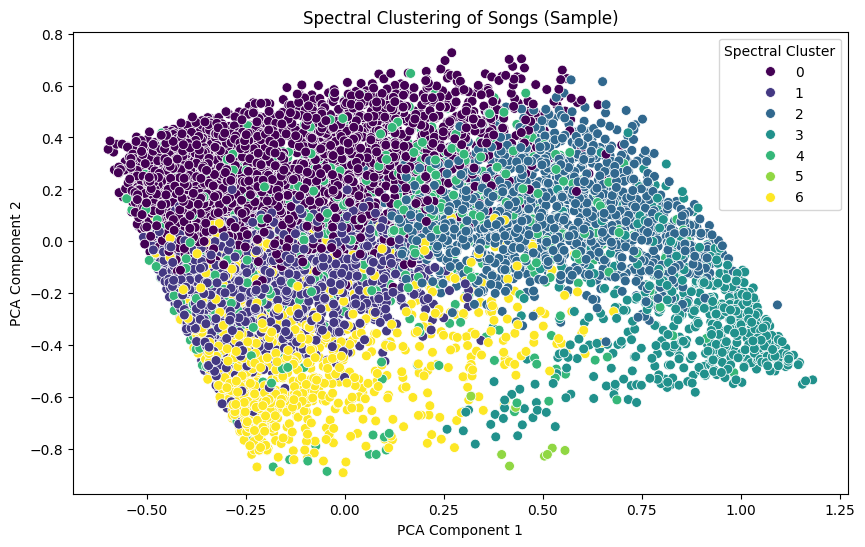

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample.drop(columns=['SpectralCluster'], errors='ignore'))

# Plot Spectral Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_sample['SpectralCluster'], palette="viridis", s=50)
plt.title("Spectral Clustering of Songs (Sample)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Spectral Cluster")
plt.show()

